# Calculating ENSO with Xarray

## Overview

In this tutorial, we perform and demonstrate the following tasks:

1. Load SST data from the CESM2 model

2. Mask data using <span style='color:red'>.where()</span>

3. Compute climatologies and anomalies using <span style='color:red'>.groupby()</span>

4. Use <span style='color:red'>.rolling()</span> to compute moving average

5. Compute, normalize, and plot the Niño 3.4 Index




## Imports

For this tutorial, we import several Python packages. As plotting ENSO data requires a geographically accurate map, Cartopy is imported to handle geographic features and map projections. Xarray is used to manage raw data, and Matplotlib allows for feature-rich data plotting. 

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs



## The Niño 3.4 Index

In this tutorial, we combine topics covered in previous Xarray tutorials to demonstrate a real-world example. The real-world scenario demonstrated in this tutorial is the computation of the Niño 3.4 Index, as shown in the CESM2 submission for the CMIP6 project. A rough definition of Niño 3.4, in addition to a definition of Niño data computation, is listed below:

* Niño 3.4 (5N-5S, 170W-120W): The Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast. The Niño 3.4 index typically uses a 5-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.

* Niño X Index computation: a) Compute area averaged total SST from Niño X region; b) Compute monthly climatology (e.g., 1950-1979) for area averaged total SST from Niño X region, and subtract climatology from area averaged total SST time series to obtain anomalies; c) Smooth the anomalies with a 5-month running mean; d) Normalize the smoothed values by its standard deviation over the climatological period.

![Alt text](image-2.png)


The overall goal of this tutorial is to produce a plot of ENSO data using Xarray; this plot will resemble the Oceanic Niño Index plot shown below.

![Alt text](image-3.png)



In this first example, we begin by opening datasets containing the sea-surface temperature (SST) and grid-cell size data. (These datasets are taken from the Pythia example data library, using the Pythia package imported above.) The two datasets are then combined into a single dataset using Xarray’s <span style='color:red'>merge</span> method.

In [6]:
filepath = './data/CESM2_sst_data.nc'
data = xr.open_dataset(filepath)
filepath2 = './data/CESM2_grid_variables.nc'
areacello = xr.open_dataset(filepath2).areacello

ds = xr.merge([data, areacello])
ds 

c:\Users\olaba\anaconda3\envs\pythia\lib\site-packages\xarray\conventions.py:523: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
    areacello  (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

This example uses Matplotlib and Cartopy to plot the first time slice of the dataset on an actual geographic map. By doing so, we verify that the data values fit the pattern of SST data:

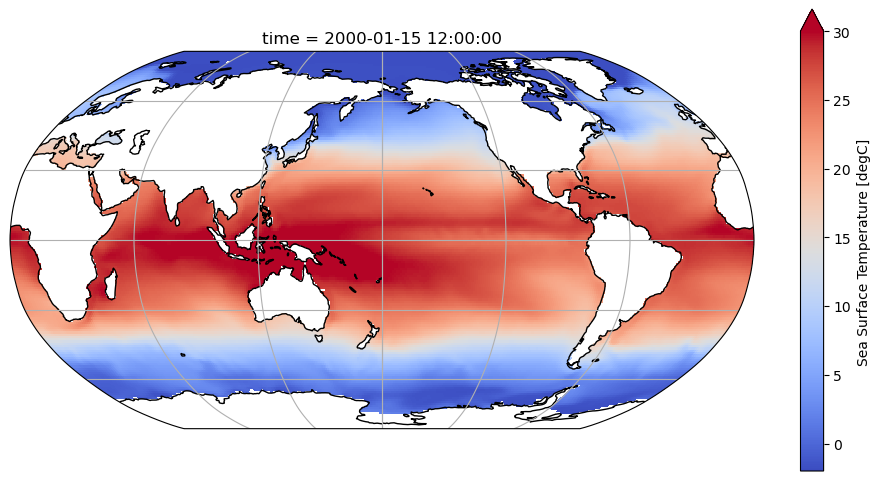

In [12]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
ds.tos.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap='coolwarm');

## Select the Niño 3.4 region

In this set of examples, we demonstrate the selection of data values from a dataset which are located in the Niño 3.4 geographic region. The following example illustrates a selection technique that uses the <span style='color:red'>sel()</span> or <span style='color:red'>isel()</span> method:

In [13]:
tos_nino34 = ds.sel(lat=slice(-5, 5), lon=slice(190, 240))
tos_nino34

<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 10, lon: 50)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon        (lon) float64 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
    areacello  (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

This example illustrates the alternate technique for selecting Niño 3.4 data, which makes use of the <span style='color:red'>where()</span> method:

In [15]:
tos_nino34 = ds.where((ds.lat < 5) & (ds.lat > -5) & (ds.lon > 190) & (ds.lon < 240), drop=True)
tos_nino34

<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 10, lon: 50)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon        (lon) float64 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2, lat, lon) object 2000-01-01 00:00:00 ... 2015-01-01...
    lat_bnds   (lat, d2, lon) float64 -5.0 -5.0 -5.0 -5.0 ... 5.0 5.0 5.0 5.0
    lon_bnds   (lon, d2, lat) float64 190.0 190.0 190.0 ... 240.0 240.0 240.0
    tos        (time, lat, lon) float32 28.26 28.16 28.06 ... 28.54 28.57 28.63
    areacello  (lat, lon) float64 1.233e+10 1.233e+10 ... 1.233e+10 1.233e+10
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

Finally, we plot the selected region to ensure it fits the definition of the Niño 3.4 region:

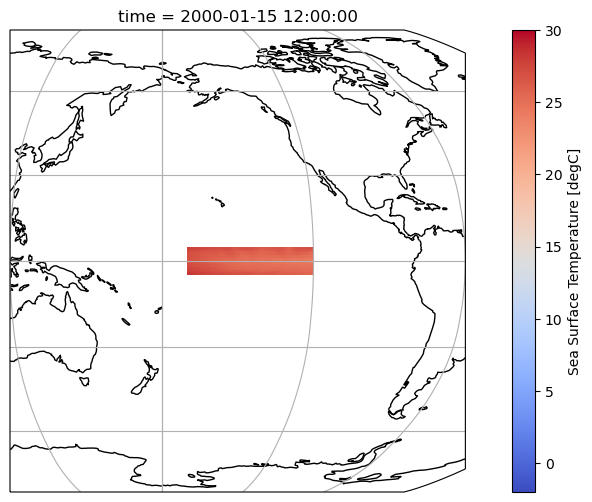

In [16]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
tos_nino34.tos.isel(time=0).plot(
    ax=ax, transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap='coolwarm'
)
ax.set_extent((120, 300, 10, -10))

## Compute the anomalies

There are three main steps to obtain the anomalies from the Niño 3.4 dataset created in the previous set of examples. First, we use the <span style='color:red'>groupby()</span> method to convert to monthly data. Second, we subtract the mean sea-surface temperature (SST) from the monthly data. Finally, we obtain the anomalies by computing a weighted average. These steps are illustrated in the next example:

In [17]:
gb = tos_nino34.tos.groupby('time.month')
tos_nino34_anom = gb - gb.mean(dim='time')
index_nino34 = tos_nino34_anom.weighted(tos_nino34.areacello).mean(dim=['lat', 'lon'])

In this example, we smooth the data curve by applying a <span style='color:red'>mean</span> function with a 5-month moving window to the anomaly dataset. We then plot the smoothed data against the original data to demonstrate:

In [18]:
index_nino34_rolling_mean = index_nino34.rolling(time=5, center=True).mean()

In [ ]:
index_nino34.plot(size=8)
index_nino34_rolling_mean.plot()
plt.legend(['anomaly', '5-month running mean anomaly'])
plt.title('SST anomaly over the Niño 3.4 region');

Since the ENSO index conveys deviations from a norm, the calculation of Niño data requires a standard deviation. In this example, we calculate the standard deviation of the SST in the Niño 3.4 region data, across the entire time period of the data array:

In [20]:
std_dev = tos_nino34.tos.std()
std_dev

<xarray.DataArray 'tos' ()>
array(1.84363365)

The final step of the Niño 3.4 index calculation involves normalizing the data. In this example, we perform this normalization by dividing the smoothed anomaly data by the standard deviation calculated above:

In [21]:
normalized_index_nino34_rolling_mean = index_nino34_rolling_mean / std_dev

## Visualize the computed Niño 3.4 index

In this example, we use Matplotlib to generate a plot of our final Niño 3.4 data. This plot is set up to highlight values above 0.5, corresponding to El Niño (warm) events, and values below -0.5, corresponding to La Niña (cold) events.

In [ ]:
fig = plt.figure(figsize=(12, 6))

plt.fill_between(
    normalized_index_nino34_rolling_mean.time.data,
    normalized_index_nino34_rolling_mean.where(
        normalized_index_nino34_rolling_mean >= 0.4
    ).data,
    0.4,
    color='red',
    alpha=0.9,
)
plt.fill_between(
    normalized_index_nino34_rolling_mean.time.data,
    normalized_index_nino34_rolling_mean.where(
        normalized_index_nino34_rolling_mean <= -0.4
    ).data,
    -0.4,
    color='blue',
    alpha=0.9,
)

normalized_index_nino34_rolling_mean.plot(color='black')
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.title('Niño 3.4 Index');